In [1]:
#Author Roni Herschmann
import axelrod as axl
import seaborn as sns
import pandas as pd
import numpy as np
import nashpy as nash
import matplotlib.pyplot as plt
import scipy
sns.set_theme(style="darkgrid")
len(axl.strategies)

240

In [2]:
#Three Different Prisoners Dilemma Tournaments
players =  (axl.Cooperator(), axl.Alternator(), axl.TitForTat(), axl.Defector(), axl.Grudger())
matchSetGame = axl.Tournament(players=players, turns=50)
results =  matchSetGame.play()

Analysing: 100%|███████████████████████████████| 25/25 [00:00<00:00, 203.25it/s]


In [3]:
#The Payoff Matrix
payoff_matrix = np.array(results.payoff_matrix)
print("Payoffs:")
print(payoff_matrix)

Payoffs:
[[3.   1.5  3.   0.   3.  ]
 [4.   2.   2.56 0.5  0.64]
 [3.   2.46 3.   0.98 3.  ]
 [5.   3.   1.08 1.   1.08]
 [3.   2.94 3.   0.98 3.  ]]


In [4]:
#Three Different Prisoners Dilemma Tournaments
players =  (axl.Cooperator(), axl.Alternator())
matchSetGameTwo = axl.Tournament(players=players, turns=25)
results =  matchSetGameTwo.play()

Analysing: 100%|███████████████████████████████| 25/25 [00:00<00:00, 433.58it/s]


In [5]:
#The Payoff Matrix
payoff_matrix = np.array(results.payoff_matrix)
print("Payoffs:")
print(payoff_matrix)

Payoffs:
[[3.   1.56]
 [3.96 2.04]]


In [19]:
#Nashpy for Nash Equilibrium 
playerOnePayoff = payoff_matrix[:2,:2]
playerTwoPayoff = payoff_matrix[:2, :2]
nashTest = nash.Game(playerOnePayoff, playerTwoPayoff)
print("Nash Equilibrium")
for eq in nashTest.support_enumeration():
    print(eq)

Nash Equilibrium
(array([1., 0.]), array([1., 0.]))


In [6]:
#Three Different Prisoners Dilemma Tournaments
players =  (axl.TitForTat(), axl.Defector(), axl.Grudger())
matchSetGameThree = axl.Tournament(players=players, turns=25)
results =  matchSetGameThree.play()

Analysing: 100%|███████████████████████████████| 25/25 [00:00<00:00, 715.71it/s]


In [7]:
#The Payoff Matrix
payoff_matrix = np.array(results.payoff_matrix)
print("Payoffs:")
print(payoff_matrix)

Payoffs:
[[3.   0.96 3.  ]
 [1.16 1.   1.16]
 [3.   0.96 3.  ]]


In [8]:
#Nashpy for Nash Equilibrium 
playerOnePayoff = payoff_matrix[:2,:2]
playerTwoPayoff = payoff_matrix[:2, :2]
nashTest = nash.Game(playerOnePayoff, playerTwoPayoff)
print("Nash Equilibrium")
for eq in nashTest.support_enumeration():
    print(eq)

Nash Equilibrium
(array([1., 0.]), array([1., 0.]))


In [23]:
#Least Squares Algorithm
from scipy.linalg import lstsq
A = payoff_matrix
b = payoff_matrix.sum(axis=1).reshape(-1, 1)

x, residuals, rank, s=lstsq(A, b)

print("Solution:", x)
print("Matrix Rank:", rank)
print("Matrix Values:", s)

Solution: [[1.]
 [1.]
 [1.]]
Matrix Rank: 2
Matrix Values: [6.41785169e+00 5.87860266e-01 6.71013492e-17]


Analysing: 100%|███████████████████████████████| 25/25 [00:00<00:00, 651.87it/s]
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


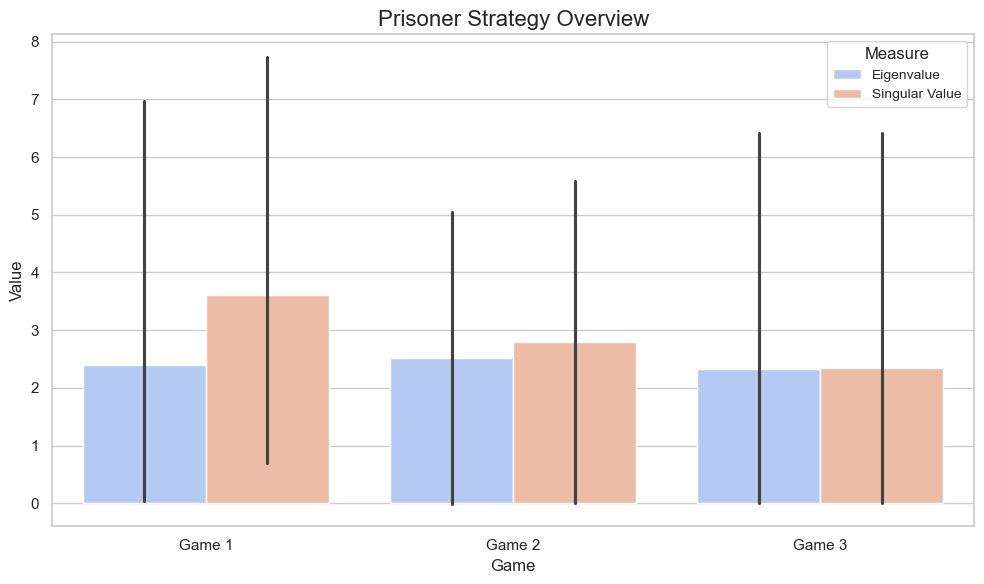

Game 1: Rank = 5
Game 2: Rank = 2
Game 3: Rank = 2


In [15]:
ames = [
    {"name": "Game 1", "players": [axl.Cooperator(), axl.Alternator(), axl.TitForTat(), axl.Defector(), axl.Grudger()], "turns": 50},
    {"name": "Game 2", "players": [axl.Cooperator(), axl.Alternator()], "turns": 25},
    {"name": "Game 3", "players": [axl.TitForTat(), axl.Defector(), axl.Grudger()], "turns": 25},
]

# Collect data for analysis
analysis_data = []
for game in games:
    tournament = axl.Tournament(players=game["players"], turns=game["turns"])
    results = tournament.play()
    
    # Payoff matrix
    payoff_matrix = np.array(results.payoff_matrix)
    
    # Linear algebra computations
    eigenvalues = np.linalg.eigvals(payoff_matrix)  # Eigenvalues
    singular_values = np.linalg.svd(payoff_matrix, compute_uv=False)  # Singular values
    rank = np.linalg.matrix_rank(payoff_matrix)  # Rank
    
    # Store analysis
    analysis_data.append({
        "Game": game["name"],
        "Payoff Matrix": payoff_matrix,
        "Eigenvalues": eigenvalues,
        "Singular Values": singular_values,
        "Rank": rank
    })

# Prepare data for visualization
eigenvalue_data = []
singular_value_data = []
for game in analysis_data:
    for i, value in enumerate(game["Eigenvalues"]):
        eigenvalue_data.append({"Game": game["Game"], "Value": value, "Type": "Eigenvalue"})
    for i, value in enumerate(game["Singular Values"]):
        singular_value_data.append({"Game": game["Game"], "Value": value, "Type": "Singular Value"})

# Combine eigenvalues and singular values into one DataFrame
df_values = pd.DataFrame(eigenvalue_data + singular_value_data)

# Visualization
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=df_values, x="Game", y="Value", hue="Type", palette="coolwarm")
plt.title("Prisoner Strategy Overview", fontsize=16)
plt.xlabel("Game", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(title="Measure", fontsize=10, loc="upper right")
plt.tight_layout()
plt.show()

# Display ranks
for game in analysis_data:
    print(f"{game['Game']}: Rank = {game['Rank']}")

Analysing: 100%|███████████████████████████████| 25/25 [00:00<00:00, 772.87it/s]


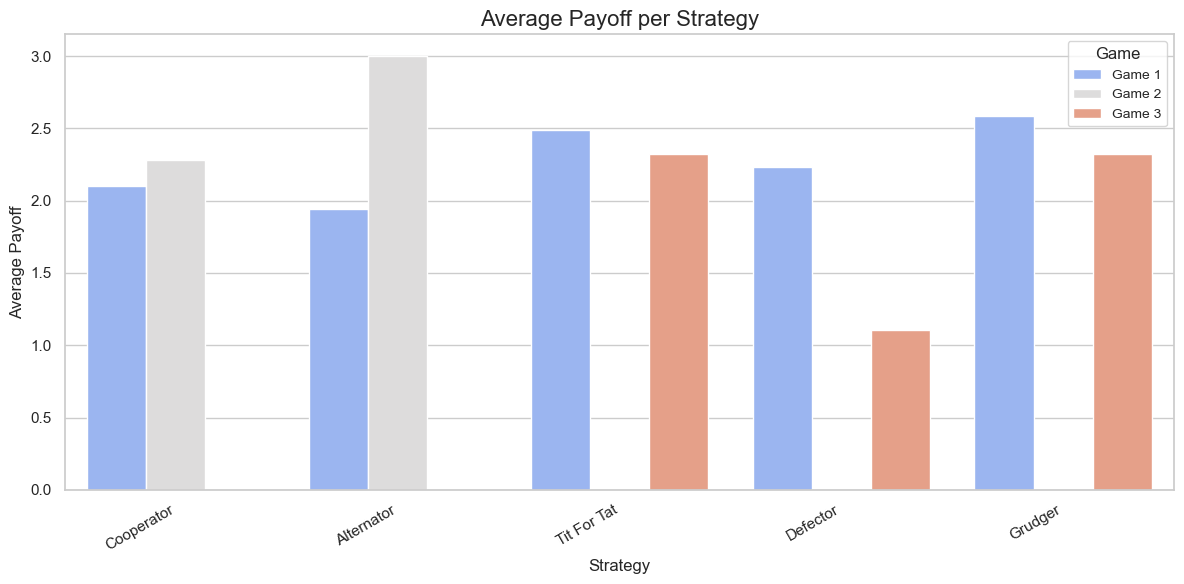

In [17]:
games = [
    {"name": "Game 1", "players": [axl.Cooperator(), axl.Alternator(), axl.TitForTat(), axl.Defector(), axl.Grudger()], "turns": 50},
    {"name": "Game 2", "players": [axl.Cooperator(), axl.Alternator()], "turns": 25},
    {"name": "Game 3", "players": [axl.TitForTat(), axl.Defector(), axl.Grudger()], "turns": 25},
]

# Collect data
strategy_performance = []
for game in games:
    tournament = axl.Tournament(players=game["players"], turns=game["turns"])
    results = tournament.play()
    
    # Payoff matrix
    payoff_matrix = np.array(results.payoff_matrix)
    strategies = [str(player) for player in game["players"]]
    
    for i, strategy in enumerate(strategies):
        avg_payoff = np.mean(payoff_matrix[i])  # Average payoff for this strategy
        strategy_performance.append({
            "Game": game["name"],
            "Strategy": strategy,
            "Average Payoff": avg_payoff
        })

# Convert to DataFrame
df_strategies = pd.DataFrame(strategy_performance)

# Visualization: Strategy performance across games
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_strategies, 
    x="Strategy", 
    y="Average Payoff", 
    hue="Game", 
    palette="coolwarm"
)
plt.title("Average Payoff per Strategy", fontsize=16)
plt.xlabel("Strategy", fontsize=12)
plt.ylabel("Average Payoff", fontsize=12)
plt.legend(title="Game", fontsize=10, loc="upper right")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [22]:
from scipy.linalg import lstsq

# Define data for three games
games = [
    {"name": "Game 1", "players": [axl.Cooperator(), axl.Alternator(), axl.TitForTat(), axl.Defector(), axl.Grudger()], "turns": 50},
    {"name": "Game 2", "players": [axl.Cooperator(), axl.Alternator()], "turns": 25},
    {"name": "Game 3", "players": [axl.TitForTat(), axl.Defector(), axl.Grudger()], "turns": 25},
]

# Perform least squares analysis for each game's payoff matrix
for game in games:
    tournament = axl.Tournament(players=game["players"], turns=game["turns"])
    results = tournament.play()
    
    # Payoff matrix
    A = np.array(results.payoff_matrix)
    b = A.sum(axis=1).reshape(-1, 1)  # Row sums as target vector

    # Least squares calculation
    x, residuals, rank, s = lstsq(A, b)

    # Print results
    print(f"\n{game['name']}:")
    print(f"Solution (x):\n{x}")
    print(f"Residual Error: {residuals}")
    print(f"Rank: {rank}")
    print(f"Singular Values: {s}")

Analysing: 100%|███████████████████████████████| 25/25 [00:00<00:00, 660.11it/s]



Game 1:
Solution (x):
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Residual Error: []
Rank: 5
Singular Values: [12.29124717  3.22699106  1.43446494  0.90762258  0.20567756]


Analysing: 100%|███████████████████████████████| 25/25 [00:00<00:00, 678.81it/s]



Game 2:
Solution (x):
[[1.]
 [1.]]
Residual Error: []
Rank: 2
Singular Values: [5.59255701 0.0102994 ]


Analysing: 100%|███████████████████████████████| 25/25 [00:00<00:00, 699.01it/s]


Game 3:
Solution (x):
[[1.]
 [1.]
 [1.]]
Residual Error: []
Rank: 2
Singular Values: [6.41785169e+00 5.87860266e-01 6.71013492e-17]
